In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%autosave 240

Autosaving every 240 seconds


### Legenda do Dataset

In the train data, the basetimes were in the years 2010 and 2011. In the test data the basetimes were in February and March 2012. This simulates the real-world situtation in which training data from the past is available to predict events in the future. 

|Coluna|Descrição|
|:----:|:-------:|
|0...49|Average, standard deviation, min, max and median of the Attributes 50...59 for the source of the current blog post. With source we mean the blog on which the post appeared. For example, myblog.blog.org would be the source of the post myblog.blog.org/post_2010_09_10|
|50:|Total number of comments before basetime|
|51:|Number of comments in the last 24 hours before the basetime|
|52:|Let T1 denote the datetime 48 hours before basetime, Let T2 denote the datetime 24 hours before basetime. This attribute is the number of comments in the time period between T1 and T2|
|53:|Number of comments in the first 24 hours after the publication of the blog post, but before basetime|
|54:|The difference of Attribute 51 and Attribute 52|
|55...59:|The same features as the attributes 50...54, but features 55...59 refer to the number of links (trackbacks), while features 50...54 refer to the number of comments.|
|60:|The length of time between the publication of the blog post and basetime|
|61:|The length of the blog post|
|62...261:|The 200 bag of words features for 200 frequent words of the text of the blog post|
|262...268:|binary indicator features (0 or 1) for the weekday (Monday...Sunday) of the basetime|
|269...275:|binary indicator features (0 or 1) for the weekday (Monday...Sunday) of the date of publication of the blog post|
|276:|Number of parent pages: we consider a blog post P as a parent of blog post B, if B is a reply (trackback) to blog post P.|
|277...279:|Minimum, maximum, average number of comments that the parents received|
|280:|The target: the number of comments in the next 24 hours (relative to basetime)|

In [2]:
train_dataset = pd.read_csv('BlogFeedback/blogData_train.csv', header=None)

# Seleção de Features
---
## Método de Filtro

## Matriz de Correlação (Correlação de Pearson)

### Matriz de correlação dos dados brutos

Matriz de correlação é uma tablema mostrando os coeficientes de correlação entre um conjunto de variáveis. Os coeficientes de correlação são usados em estatística para medir o quão forte é a relação entre duas variáveis. Para calcular o coeficiente de correlação existem alguns algoritmos, o mais notável sendo a correlação de Pearson, comumente usado em regressões lineares. A partir desse método achamos nossos coeficientes que variam entre -1 e 1, sendo que o primeiro denota uma relação negativa forte e o segundo uma relação positiva forte, ambos podemos descartar. O ideal para um coeficiente de correlação seria 0, que significaria que não existe relação entre as variáveis.

![correlacao](http://www.statisticshowto.com/wp-content/uploads/2012/10/pearson-2-small.png)
<center>Correlação de Pearson</center>

![teste de correlação](http://www.statisticshowto.com/wp-content/uploads/2009/11/ppm.png)
<center>Teste da correlação de Pearson</center>

![formula pearson](https://www.analyticsvidhya.com/wp-content/uploads/2016/11/FS2.png)

In [3]:
# Brute Data
new_x = train_dataset
new_x = new_x.iloc[:, 50:62]
new_target = train_dataset.iloc[:, [280]]
print(new_x.shape)
new_x[0:5]

(52397, 12)


,50,51,52,53,54,55,56,57,58,59,60,61
0,2.0,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0
1,6.0,2.0,4.0,5.0,-2.0,0.0,0.0,0.0,0.0,0.0,35.0,0.0
2,6.0,2.0,4.0,5.0,-2.0,0.0,0.0,0.0,0.0,0.0,35.0,0.0
3,2.0,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0
4,3.0,1.0,2.0,2.0,-1.0,0.0,0.0,0.0,0.0,0.0,34.0,0.0


In [4]:
def plot_coor_matrix(corr_matrix, headers=None, title=''):
    headers = headers or corr_matrix.columns
    plt.matshow(corr_matrix)
    plt.xticks(range(len(corr_matrix)), headers, rotation='vertical')
    plt.yticks(range(len(corr_matrix)), headers)
    clb = plt.colorbar()
    print('\t'+title)
    plt.show()

	Pearson Corr


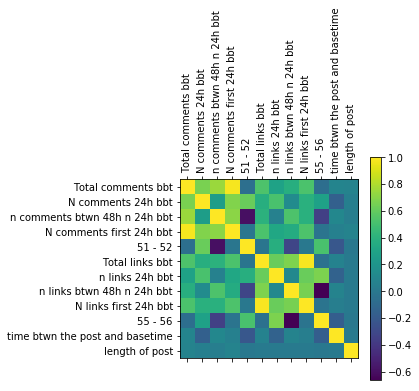

	Spearman Corr


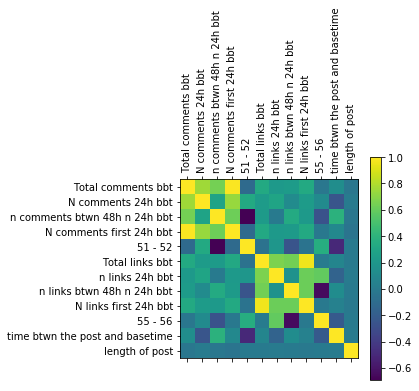

	Kendall Corr


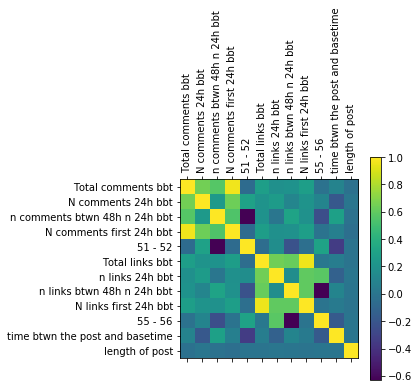

In [5]:
matrix_corr_pearson = new_x.corr()
matrix_corr_spearman = new_x.corr(method='spearman')
matrix_corr_kendall = new_x.corr(method='kendall')

headers = ['Total comments bbt', 'N comments 24h bbt',
           'n comments btwn 48h n 24h bbt', 'N comments first 24h bbt',
           '51 - 52', 'Total links bbt',
           'n links 24h bbt', 'n links btwn 48h n 24h bbt',
           'N links first 24h bbt', '55 - 56',
           'time btwn the post and basetime', 'length of post'
          ]
plot_coor_matrix(matrix_corr_pearson, headers, 'Pearson Corr')
plot_coor_matrix(matrix_corr_spearman, headers, 'Spearman Corr')
plot_coor_matrix(matrix_corr_kendall, headers, 'Kendall Corr')

In [6]:
def test_corr(matrix_corr, verbose=1):
    size = len(matrix_corr)
    reject = []
    for i in matrix_corr.columns:
        for j in matrix_corr.columns:
            if (i == j):
                continue
            x = np.fabs(matrix_corr[i][j])
            not_rejected = ((i, j) not in reject) and ((j, i) not in reject)  
            if ((x > 0.798) and not_rejected):
                reject.append((i, j))
                if (verbose > 0):
                    print('Reject either \'{0}\' or \'{1}\'.'.format(
                        i, j
                    ))
    return reject

In [7]:
reject_index_pearson = test_corr(matrix_corr_pearson)
print('-----')
reject_index_spearman = test_corr(matrix_corr_spearman)
print('-----')
reject_index_kendall = test_corr(matrix_corr_kendall)

Reject either '50' or '53'.
Reject either '55' or '58'.
-----
Reject either '50' or '53'.
Reject either '55' or '58'.
-----
Reject either '50' or '53'.
Reject either '55' or '58'.


### Resultado matriz de correlação
Com base no resultado da matriz de correlação podemos ver que existem duas _features_ que podem ser excluídas. Assim, escolhemos as _features_ 53 e 58 (_Number of comments and links in the first 24h before basetime_).

Portanto podemos também retirar do dataset as demais features que são derivadas dessas duas (_features_: 15 a 19 e 40 a 44).

In [8]:
del new_x[53]
del new_x[58]
del headers[3]
del headers[8]

		Nova matriz de correlação


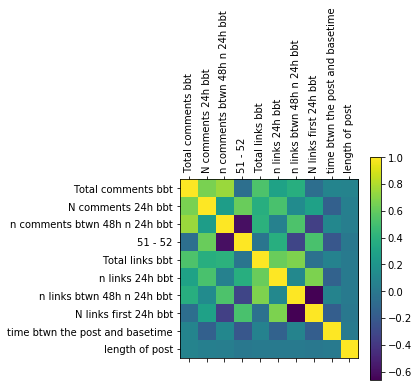

In [11]:
plot_coor_matrix(new_x.corr(), headers, '\tNova matriz de correlação')

#### Retirando os dados derivados

In [9]:
aux = train_dataset.iloc[:, 0:50]
aux = aux.drop(aux.loc[:, 15:19].head(0).columns, axis=1)
aux = aux.drop(aux.loc[:, 40:44].head(0).columns, axis=1)
new_x = pd.concat([aux, new_x], axis=1)
del aux
print(new_x.columns)

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 20, 21,
            22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
            39, 45, 46, 47, 48, 49, 50, 51, 52, 54, 55, 56, 57, 59, 60, 61],
           dtype='int64')


###  Correlação entre o restante das variáveis
Agora que vimos a correlação entre as variáveis brutas podemos adicionar mais algumas variáveis e calcular a correlação entre elas.

In [10]:
reject_index = test_corr(new_x.corr(), verbose=-1)
print(reject_index)

[(0, 1), (0, 3), (0, 4), (0, 5), (0, 6), (0, 9), (0, 10), (0, 11), (0, 13), (0, 14), (0, 20), (0, 21), (1, 3), (1, 4), (1, 5), (1, 6), (1, 8), (1, 10), (1, 11), (1, 13), (1, 21), (1, 22), (1, 23), (3, 5), (3, 6), (3, 8), (3, 10), (3, 11), (3, 13), (3, 21), (3, 22), (3, 23), (4, 5), (4, 6), (4, 9), (4, 10), (4, 11), (4, 14), (4, 20), (4, 21), (4, 34), (5, 6), (5, 9), (5, 10), (5, 11), (5, 14), (5, 20), (5, 21), (5, 34), (6, 8), (6, 10), (6, 11), (6, 13), (6, 21), (6, 22), (6, 23), (8, 11), (8, 13), (8, 21), (8, 22), (8, 23), (9, 10), (9, 14), (9, 20), (9, 34), (10, 11), (10, 14), (10, 20), (10, 21), (10, 34), (11, 13), (11, 21), (11, 22), (11, 23), (13, 21), (13, 22), (13, 23), (14, 20), (14, 34), (20, 34), (21, 22), (21, 23), (22, 23), (25, 26), (25, 29), (25, 30), (25, 31), (25, 35), (25, 36), (25, 46), (26, 28), (26, 30), (26, 31), (26, 33), (26, 35), (26, 36), (26, 38), (26, 46), (26, 47), (26, 48), (28, 31), (28, 33), (28, 36), (28, 38), (28, 46), (28, 47), (28, 48), (29, 30), (29,

In [11]:
reject_count = {}
for left, right in reject_index:
    try:
        reject_count[right] += 1
    except:
        reject_count[right] = 1
        
    try:
        reject_count[left] += 1
    except:
        reject_count[left] = 1

print(reject_count)

{1: 12, 0: 12, 3: 11, 4: 11, 5: 12, 6: 12, 9: 7, 10: 12, 11: 12, 13: 9, 14: 7, 20: 7, 21: 12, 8: 8, 22: 8, 23: 8, 34: 6, 26: 11, 25: 7, 29: 6, 30: 7, 31: 12, 35: 7, 36: 12, 46: 12, 28: 8, 33: 8, 38: 8, 47: 8, 48: 8}


In [12]:
# Sorting the rejection count
import operator
sorted_reject = sorted(reject_count.items(),
                       key=operator.itemgetter(1))
print(sorted_reject)

[(34, 6), (29, 6), (9, 7), (14, 7), (20, 7), (25, 7), (30, 7), (35, 7), (8, 8), (22, 8), (23, 8), (28, 8), (33, 8), (38, 8), (47, 8), (48, 8), (13, 9), (3, 11), (4, 11), (26, 11), (1, 12), (0, 12), (5, 12), (6, 12), (10, 12), (11, 12), (21, 12), (31, 12), (36, 12), (46, 12)]


In [13]:
for i, count in sorted_reject:
    if i in new_x.columns:
        del new_x[i]
        
reject_index = test_corr(new_x.corr(), verbose=-1)
print(reject_index)

[]


		Nova matriz de correlação


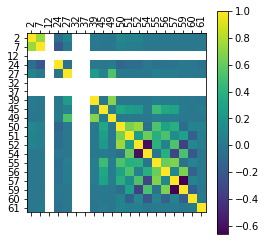

,2,7,12,24,27,32,37,39,45,49,50,51,52,54,55,56,57,59,60,61
count,52397.000000,52397.000000,52397.0,52397.000000,52397.000000,52397.0,52397.0,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000
mean,0.358914,0.002748,0.0,-0.467164,0.002195,0.0,0.0,0.000401,0.011718,0.000286,39.444167,15.214612,14.053114,1.161498,0.501345,0.191614,0.179896,0.011718,34.777888,2850.294864
std,6.840717,0.131903,0.0,3.332347,0.075003,0.0,0.0,0.017741,0.022452,0.018533,111.085471,57.537818,56.407499,69.278848,1.562923,0.877402,0.870984,1.166225,20.652368,3814.180711
min,0.000000,0.000000,0.0,-138.000000,0.000000,0.0,0.0,0.000000,-0.055556,-0.500000,0.000000,0.000000,0.000000,-1256.000000,0.000000,0.000000,0.000000,-20.000000,0.000000,0.000000
25%,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,14.000000,93.000000
50%,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.000000,1859.000000
75%,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.014286,0.000000,25.000000,4.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,55.000000,3959.000000
max,726.000000,14.000000,0.0,191.000000,8.000000,0.0,0.0,1.000000,0.666667,1.000000,2044.000000,1424.000000,1424.000000,1422.000000,30.000000,24.000000,24.000000,23.000000,72.000000,57894.000000


In [14]:
plot_coor_matrix(new_x.corr(), title='\tNova matriz de correlação')
new_x.describe()

In [15]:
del new_x[12]
del new_x[32]
del new_x[37]

	Nova matriz de correlação


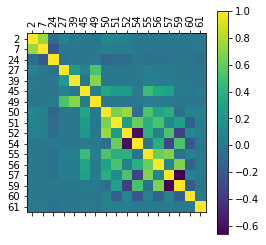

,2,7,24,27,39,45,49,50,51,52,54,55,56,57,59,60,61
count,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000
mean,0.358914,0.002748,-0.467164,0.002195,0.000401,0.011718,0.000286,39.444167,15.214612,14.053114,1.161498,0.501345,0.191614,0.179896,0.011718,34.777888,2850.294864
std,6.840717,0.131903,3.332347,0.075003,0.017741,0.022452,0.018533,111.085471,57.537818,56.407499,69.278848,1.562923,0.877402,0.870984,1.166225,20.652368,3814.180711
min,0.000000,0.000000,-138.000000,0.000000,0.000000,-0.055556,-0.500000,0.000000,0.000000,0.000000,-1256.000000,0.000000,0.000000,0.000000,-20.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,14.000000,93.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.000000,1859.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.014286,0.000000,25.000000,4.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,55.000000,3959.000000
max,726.000000,14.000000,191.000000,8.000000,1.000000,0.666667,1.000000,2044.000000,1424.000000,1424.000000,1422.000000,30.000000,24.000000,24.000000,23.000000,72.000000,57894.000000


In [16]:
plot_coor_matrix(new_x.corr(), title='Nova matriz de correlação')
new_x.describe()

### Aplicando a correlação de Pearson no _dataset_ inteiro

In [17]:
import operator

def find_n_delete_corr(matrix):
    reject_index = test_corr(matrix.corr(), verbose=-1)
    reject_count = {}
    for left, right in reject_index:
        try:
            reject_count[right] += 1
        except:
            reject_count[right] = 1

        try:
            reject_count[left] += 1
        except:
            reject_count[left] = 1
    sorted_reject = sorted(reject_count.items(), key=operator.itemgetter(1))
    
    for i, count in sorted_reject:
        if i in matrix.columns:
            del matrix[i]

    return matrix
    
dataset_pearson = train_dataset.iloc[:, 0:280]
dataset_pearson = find_n_delete_corr(dataset_pearson)
dataset_pearson.describe()

,7,12,24,32,37,39,45,49,51,52,...,268,269,270,271,272,273,274,275,276,277
count,52397.000000,52397.0,52397.000000,52397.0,52397.0,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,...,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.0
mean,0.002748,0.0,-0.467164,0.0,0.0,0.000401,0.011718,0.000286,15.214612,14.053114,...,0.137470,0.159227,0.167681,0.171327,0.162242,0.154455,0.096151,0.088917,0.119167,0.0
std,0.131903,0.0,3.332347,0.0,0.0,0.017741,0.022452,0.018533,57.537818,56.407499,...,0.344346,0.365891,0.373587,0.376798,0.368676,0.361388,0.294800,0.284627,1.438194,0.0
min,0.000000,0.0,-138.000000,0.0,0.0,0.000000,-0.055556,-0.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.014286,0.000000,4.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
max,14.000000,0.0,191.000000,0.0,0.0,1.000000,0.666667,1.000000,1424.000000,1424.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,136.000000,0.0


In [18]:
desc = dataset_pearson.describe()
for i in dataset_pearson.columns:
    if (desc[i]['min'] == 0) and (desc[i]['max'] == 0):
        del dataset_pearson[i]
dataset_pearson.describe()

,7,24,39,45,49,51,52,54,56,57,...,267,268,269,270,271,272,273,274,275,276
count,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,...,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000
mean,0.002748,-0.467164,0.000401,0.011718,0.000286,15.214612,14.053114,1.161498,0.191614,0.179896,...,0.161650,0.137470,0.159227,0.167681,0.171327,0.162242,0.154455,0.096151,0.088917,0.119167
std,0.131903,3.332347,0.017741,0.022452,0.018533,57.537818,56.407499,69.278848,0.877402,0.870984,...,0.368133,0.344346,0.365891,0.373587,0.376798,0.368676,0.361388,0.294800,0.284627,1.438194
min,0.000000,-138.000000,0.000000,-0.055556,-0.500000,0.000000,0.000000,-1256.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.014286,0.000000,4.000000,3.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,14.000000,191.000000,1.000000,0.666667,1.000000,1424.000000,1424.000000,1422.000000,24.000000,24.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,136.000000


## Chi Squared

In [19]:
from sklearn.feature_selection import chi2, SelectKBest

def selectKBest_ch2(X, y, k):
    ch2 = SelectKBest(chi2, k)
    x_ch2 = ch2.fit_transform(X, y)
    
    x_columns = X.head(0).columns
    feat_ch2 = [x_columns[i] for i in ch2.get_support(indices=True)]

    return feat_ch2

In [20]:
X = train_dataset.iloc[:, 0:280]

# Retirando valores negativos
X = X.drop(X.loc[:, 20:24].head(0).columns, axis=1)
X = X.drop(X.loc[:, 45:49].head(0).columns, axis=1)
X = X.drop(X.loc[:, [54, 59]].head(0).columns, axis=1)

# Retirando Bag of Words, já que já foi escolhido as melhores
X = X.drop(X.loc[:, 62:261].head(0).columns, axis=1)

y = train_dataset.iloc[:, [280]]


chosen_columns = selectKBest_ch2(X, y, 30)
print('\nChosen columns: ', chosen_columns)

del X
del y

# Recriando o dataset apenas com as features selecionadas + BOW
dataset_ch2 = train_dataset.loc[:, chosen_columns]
dataset_ch2_bow = pd.concat([dataset_ch2, train_dataset.loc[:, 62:261]],
                        axis=1)


Chosen columns:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 28, 43, 50, 51, 52, 53, 56, 60, 61, 278, 279]


## Método _Wrapper_

In [10]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

def RFE_SVR(X, y, n, s=1):
    if not n:
        n = int(X.shape[1]/2)
    
    svr = SVR(kernel='linear')
    rfe = RFE(estimator=svr,
              verbose=1,
              n_features_to_select=n,
              step=s
             )
    dataset_rfe = rfe.fit_transform(X, y)
    
    return (dataset_rfe, rfe)

In [9]:
from time import time
X = train_dataset.iloc[:, 0:61]
X = pd.concat([X, train_dataset.iloc[:, 262:279]], axis=1)
y = train_dataset.iloc[:, [280]]
y = np.ravel(y)

t0 = time()
dataset_rfe, rfe = RFE_SVR(X, y)
print('Execution time RFE:', (time() - t0))

# Tratando dados faltantes no _dataset_
Dentro do _dataset_ existem algumas _features_ que não fazem sentido serem nulas, visto isso, podemos caracterizar essa ocorrência como uma anômalia ou um erro no nosso _dataset_. Um exemplo disso é o tamanho da postagem (coluna 61).

Existem algumas abordagens que podemos tomar quanto a imputação de dados:
- Um valor constante que tem sentido dentro do dominio;
- Um valor de alguma outra amostra aleatória;
- A média, mediana ou valor de modo para a coluna;
- Um valor estimado por algum modelo preditivo;
- Ou deletar a amostra que apresenta inconsistencias.

Qualquer imputação feita no _dataset_ de treino deverá ser feita no _dataset_ de teste no futuro, quando predições forem necessárias para o modelo final. Isso é algo que precisa ser levado em conta quando for feita a escolha da técnica de imputação de dados.

In [24]:
print((train_dataset[61] == 0).sum(), 'that are == 0')
print((train_dataset[61] != 0).sum(), 'that are != 0')
train_dataset.iloc[:, 62:262].describe()

12750 that are == 0
39647 that are != 0


,62,63,64,65,66,67,68,69,70,71,...,252,253,254,255,256,257,258,259,260,261
count,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,...,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000
mean,0.001641,0.175697,0.000076,0.000305,0.353780,0.157795,0.241407,0.002424,0.003416,0.035002,...,0.000191,0.025956,0.014676,0.000248,0.042044,0.002290,0.003435,0.002615,0.008455,0.000305
std,0.040480,0.380566,0.008737,0.017472,0.478146,0.364552,0.427941,0.049173,0.058349,0.183787,...,0.013814,0.159005,0.120255,0.015750,0.200692,0.047802,0.058511,0.051067,0.091561,0.017472
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Métodos de imputação de dados dado uma lista de colunas
Utilizaremos a técnica calcular a média dos valores encontrados na coluna para imputar os dados faltantes.

O processo de escolha da técnica utilizada foi feito por eliminação, começando pelo fato de não termos domínio sobre o contexto do problema, dessa forma podemos descartar a escolha de um valor constante. Seguindo o raciocinio, podemos excluir as possibilidades de deletar amostras, escolher um valor aleátorio dado as amostras e utilizar um modelo preditivo, já que temos em uma coluna quase um terço dos dados em branco.

In [21]:
def imput_values(dataframe, columns):
    # Tornando inválido os valores nulos
    for i in columns:
        dataframe[i] = dataframe[i].replace(0, np.NaN)
    # Imputando valores com a media dos valores da coluna
    dataframe.fillna(dataframe.mean(), inplace=True)

    return dataframe

# Testando o método
imputed_X = train_dataset.copy()
imputed_X = imput_values(imputed_X, [61])
assert 0 == (imputed_X[61] == 0).sum()

## Criando Modelo

![regression models](https://www.superdatascience.com/wp-content/uploads/2017/02/Regression-Pros-Cons.pdf)

### Modelando features selecionadas

#### Chi squared

In [18]:
X_train_ch2 = dataset_ch2_bow.copy()
y_train_ch2 = train_dataset.loc[:, [280]]
y_train_ch2 = np.ravel(y_train_ch2)

In [ ]:
X_train_ch2 = imput_values(X_train_ch2, [61])

In [21]:
# Removendo colunas com target 0
zero_rows = [i for i in range(len(y)) if y[i] == 0]
zero_rows = zero_rows[0:20000]

X_train_ch2 = X_train_ch2.drop(X_train_ch2.index[zero_rows])
y_train_ch2 = train_dataset.loc[:, [280]]
y_train_ch2 = y_train_ch2.drop(y_train_ch2.index[zero_rows])
y_train_ch2 = np.ravel(y_train_ch2)

### Instanciando regressores

In [13]:
# metodos comuns aos treinamentos
from sklearn.model_selection import KFold, cross_val_score
from sklearn.externals import joblib
from time import time

#### SRV
Tempo de treinamento muito alto

In [113]:
# normalizando length of post
from sklearn.preprocessing import MinMaxScaler

norm_x = X_train_ch2.loc[:, [61]]
mms = MinMaxScaler()
norm_x = mms.fit_transform(norm_x)

norm_x = pd.DataFrame(norm_x)

In [68]:
from sklearn.svm import SVR

svr = SVR(kernel='rbf', verbose=True)
kfold = KFold(n_splits=3, random_state=7)
t0 = time()
# result = cross_val_score(svr, 
#                          X, 
#                          y, 
#                          cv=kfold, 
#                          scoring='r2',
#                          n_jobs=-1,
#                          verbose=4
#                         )

svr = svr.fit(X_train, y)

print('Execution time: %.3f' % (time() - t0))
# print('Score: %.2f' % result.mean())

[LibSVM]Execution time: 853.838


In [69]:
joblib.dump(svr, 'SVR_BOW-Zeros_blogFeedback.sav')

['SVR_BOW-Zeros_blogFeedback.sav']

#### KNN-Regressors

In [39]:
from sklearn.neighbors import KNeighborsRegressor as KNNR

knn_model = KNNR(n_neighbors=20, algorithm='auto', n_jobs=-1)
t0 = time()
d_train = train_dataset.loc[:, 0:279]
d_train = d_train.drop(d_train.index[zero_rows])
knnr = knn_model.fit(d_train, y)
print('Execution time: %.3f' % (time() - t0))

Execution time: 1.339


In [122]:
joblib.dump(knnr, 'KNN_BOW-Zeros_blogFeedback.sav')

['KNN_BOW-Zeros_blogFeedback.sav']

## Avaliação de modelos
### $R^2$

$$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$


$$ SS_{res} = \sum{(y_i - yhat_i)^2} $$
<center>onde, $ (y_i - yhat_i) $ é a distância do ponto real na função para o ponto da predição.</center>

$$ SS_{tot} = \sum{(y_i - y_{avg})^2} $$
<center>onde, $y_{avg}$ é a linha da média de todos os pontos.</center>

Sendo assim, o método de avaliação $R^2$ compara quão bom é o modelo gerado, baseado na linha média dos valores. Quanto $R^2$ está mais perto de $1$ melhor é o modelo, quanto mais longe e perto de $-1$, pior o modelo.

$R^2$ tem um grande problema quando tratamos de funções polinomiais, pois o método $R^2$ ou não descresce ou não muda, dependendo da covariância das variáveis. Dessa forma, a melhor opção para problemas polinomiais é a utilização do $R^2$ ajustado, definido pela fórmula.

$$ Adj R^2 = 1 - (1 - R^2) \frac{n - 1}{n - p - 1} $$
<center>onde, $n = tamanho\ da\ amostra$ e $p = número\ de\ regressores$  </center>

In [26]:
import os
import re
files = [f for f in os.listdir('BlogFeedback/') if re.search(r'blogData_test-.*\.csv$', f)]
test_dataset = []

for f in files:
    new_test_dataset = pd.read_csv('BlogFeedback/' + f, header=None)
    test_dataset.append(new_test_dataset)

print('Foram importados %d arquivos de teste.' % len(test_dataset))

Foram importados 60 arquivos de teste.


#### Testando SVR

In [73]:
from sklearn.externals import joblib

model = joblib.load('SVR_BOW-Zeros_blogFeedback.sav')

In [77]:
y_pred = model.predict(X_test)
score = model.score(X_test, y_test)
print('Score R^2:', score)

Score R^2: -0.0139775904542


In [79]:
print(y_test[5])
print(y_pred[5])

139.0
1.61052773105


(32397, 230)